In [1]:
## 패키지 가져오기
## 데이터 처리
import time, datetime, math, random
from io import StringIO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
## 시각화
import matplotlib.pyplot as plt  # 그래프 그리기
import missingno  # 결측값 시각화
import seaborn as sns  # 시각화 라이브러리
from pandas.plotting import scatter_matrix # 산점도 행렬 그리기
## 분류 모델
## import sklearn.ensemble as ske  # 분류 알고리즘 모음
from sklearn import datasets, model_selection, metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import  LogisticRegression,  SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
## 자동 매개 변수 튜닝기 - 랜덤 탐색
import scipy.stats as st
from scipy.stats import randint as sp_randint  # 랜덤 변수
from sklearn.model_selection import RandomizedSearchCV  # 자동 매개 변수 튜닝 도구 (랜덤 샘플링)
## 모델 평가 지표 계산
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, f1_score, precision_score, recall_score
## 경고 메시지 제어
import warnings
warnings.filterwarnings('ignore')
## 노트북에서 그래프를 표시하고 plt.show()를 생략하여 코드를 단순화하기 위함
%matplotlib inline



In [3]:
headers = ['age', 'workclass', 'final-weight',   
           'education', 'education-num',   
           'marital-status', 'occupation',   
           'relationship', 'race', 'sex',   
           'capital-gain', 'capital-loss',   
           'hours-per-week', 'country',   
           'income-level']  # 데이터 헤더, 즉 인자 이름 정의
adult_data = pd.read_csv('adult.data',   
                       header=None,   
                       names=headers,   
                       sep=',\s',   
                       na_values=["?"],   
                       engine='python')  # 데이터 집합에서 주어진 훈련 집합 가져오기
adult_test = pd.read_csv('adult.test',   
                      header=None,   
                      names=headers,   
                      sep=',\s',   
                      na_values=["?"],   
                      engine='python',   
                      skiprows=1)  # 데이터 집합에서 주어진 테스트 집합 가져오기  
dataset = pd.concat([adult_data, adult_test], ignore_index=True)  # 두 데이터 세트 병합  
# 가져올 때 두 데이터 세트에 인덱스를 추가했기 때문에 병합된 DataFrame에 대해 인덱스를 다시 만들고 원래 인덱스를 덮어씁니다
dataset.reset_index(inplace=True, drop=True)


<AxesSubplot:>

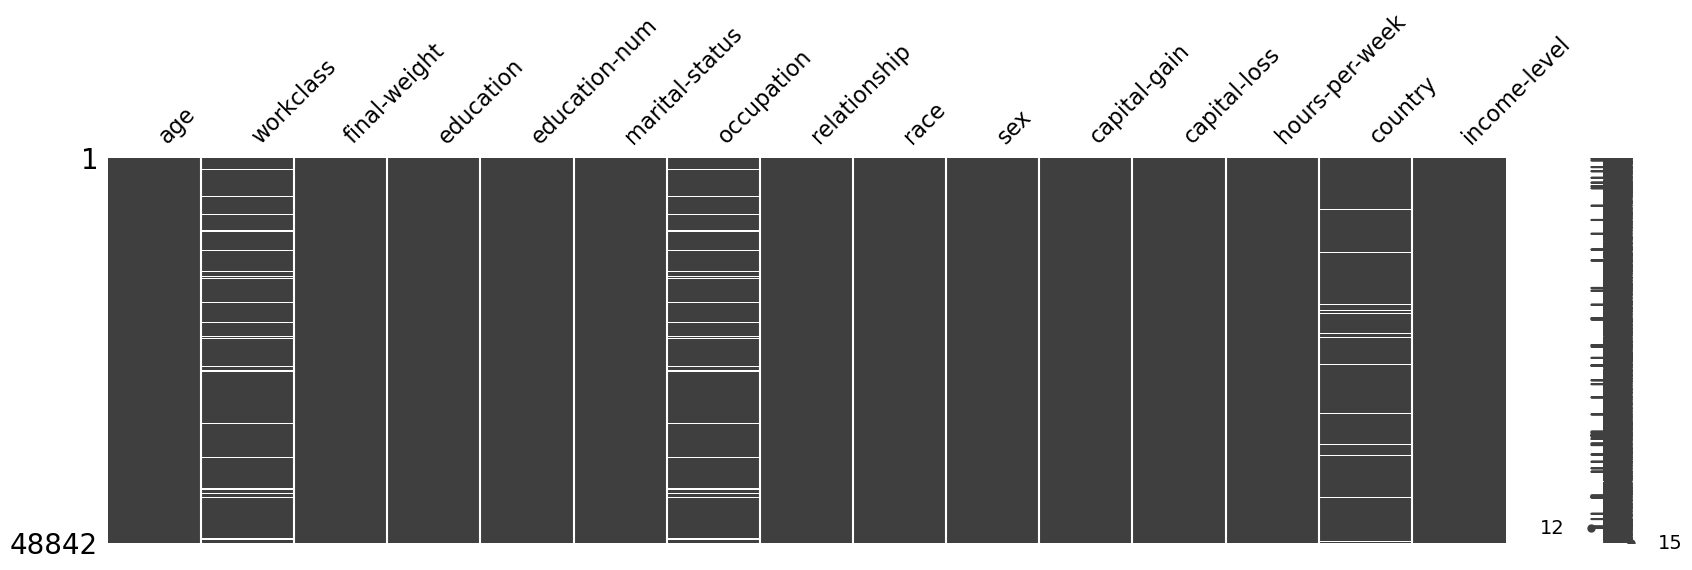

In [4]:
missingno.matrix(dataset, figsize = (20,5))  
#파이썬에서 누락된 데이터를 시각화하기 위해 사용되는 라이브러리
#. 일반적으로 결측값은 흰색 또는 빈 공간으로 표시되고, 결측값이 아닌 값은 검은색 또는 채워진 공간으로 표시됩니다. 이를 통해 데이터셋 전체에서 결측값의 분포를 한눈에 파악할 수 있습니다.

<AxesSubplot:>

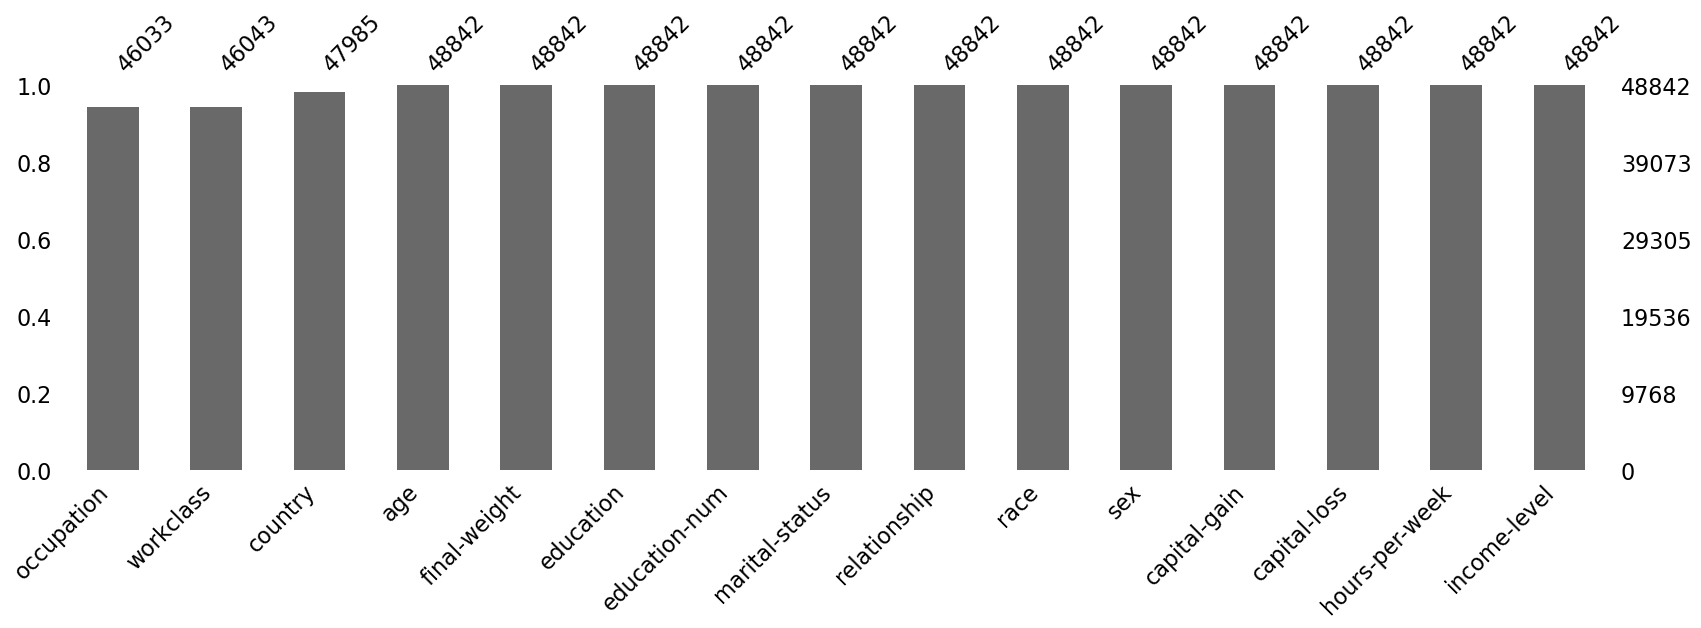

In [5]:
missingno.bar(dataset, sort='ascending', figsize = (20,5))  
# 옵션을 사용하면 누락된 값의 비율이 낮은 열부터 높은 열 순서로 정렬됩니다.

#즉, 이 명령어를 사용하면 데이터셋 전체에서 누락된 값이 어느 열에 얼마나 있는지 한눈에 파악할 수 있습니다

In [6]:
dataset.dropna(axis=0, how='any', inplace=True)  
# dropna : 결측값 포함된 행 제거 ( 데이터의 무결성(왜곡된 결과값을 초래 방지)유지
# axis=0 행을 기준으로 기준으로 결측값 찾아 수정
# any : 하나라도 결측값 있으면 행 삭제
# inplace =True :  데이터프레임 직접 수정 ( 이 옵션 없으면 새로운 데이터프레임 반환 )
dataset.describe(include='all')

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income-level
count,45222.000000,45222,4.522200e+04,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,NaN,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,22654
mean,38.547941,NaN,1.897347e+05,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,1.056392e+05,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173882e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783160e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379260e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
# 연수입 지표를 처리하다. 
#이 코드는 'income-level' 열에서 값이 '>50K.'인 경우, 이를 '>50K'로 변경합니다.
dataset.loc[dataset['income-level'] == '>50K.', 'income-level'] = '>50K'  
dataset.loc[dataset['income-level'] == '<=50K.', 'income-level'] = '<=50K'  
# 쓸모없는 final-weight 지표 삭제  
dataset = dataset.drop(['final-weight'],axis=1)  
#axis=1 : 열을 기준으로 삭제 


In [8]:
dataset.head(5) 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income-level
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
#수치 변수를 설명하다
dataset.describe(include='all') 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income-level
count,45222.000000,45222,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,34014
mean,38.547941,NaN,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


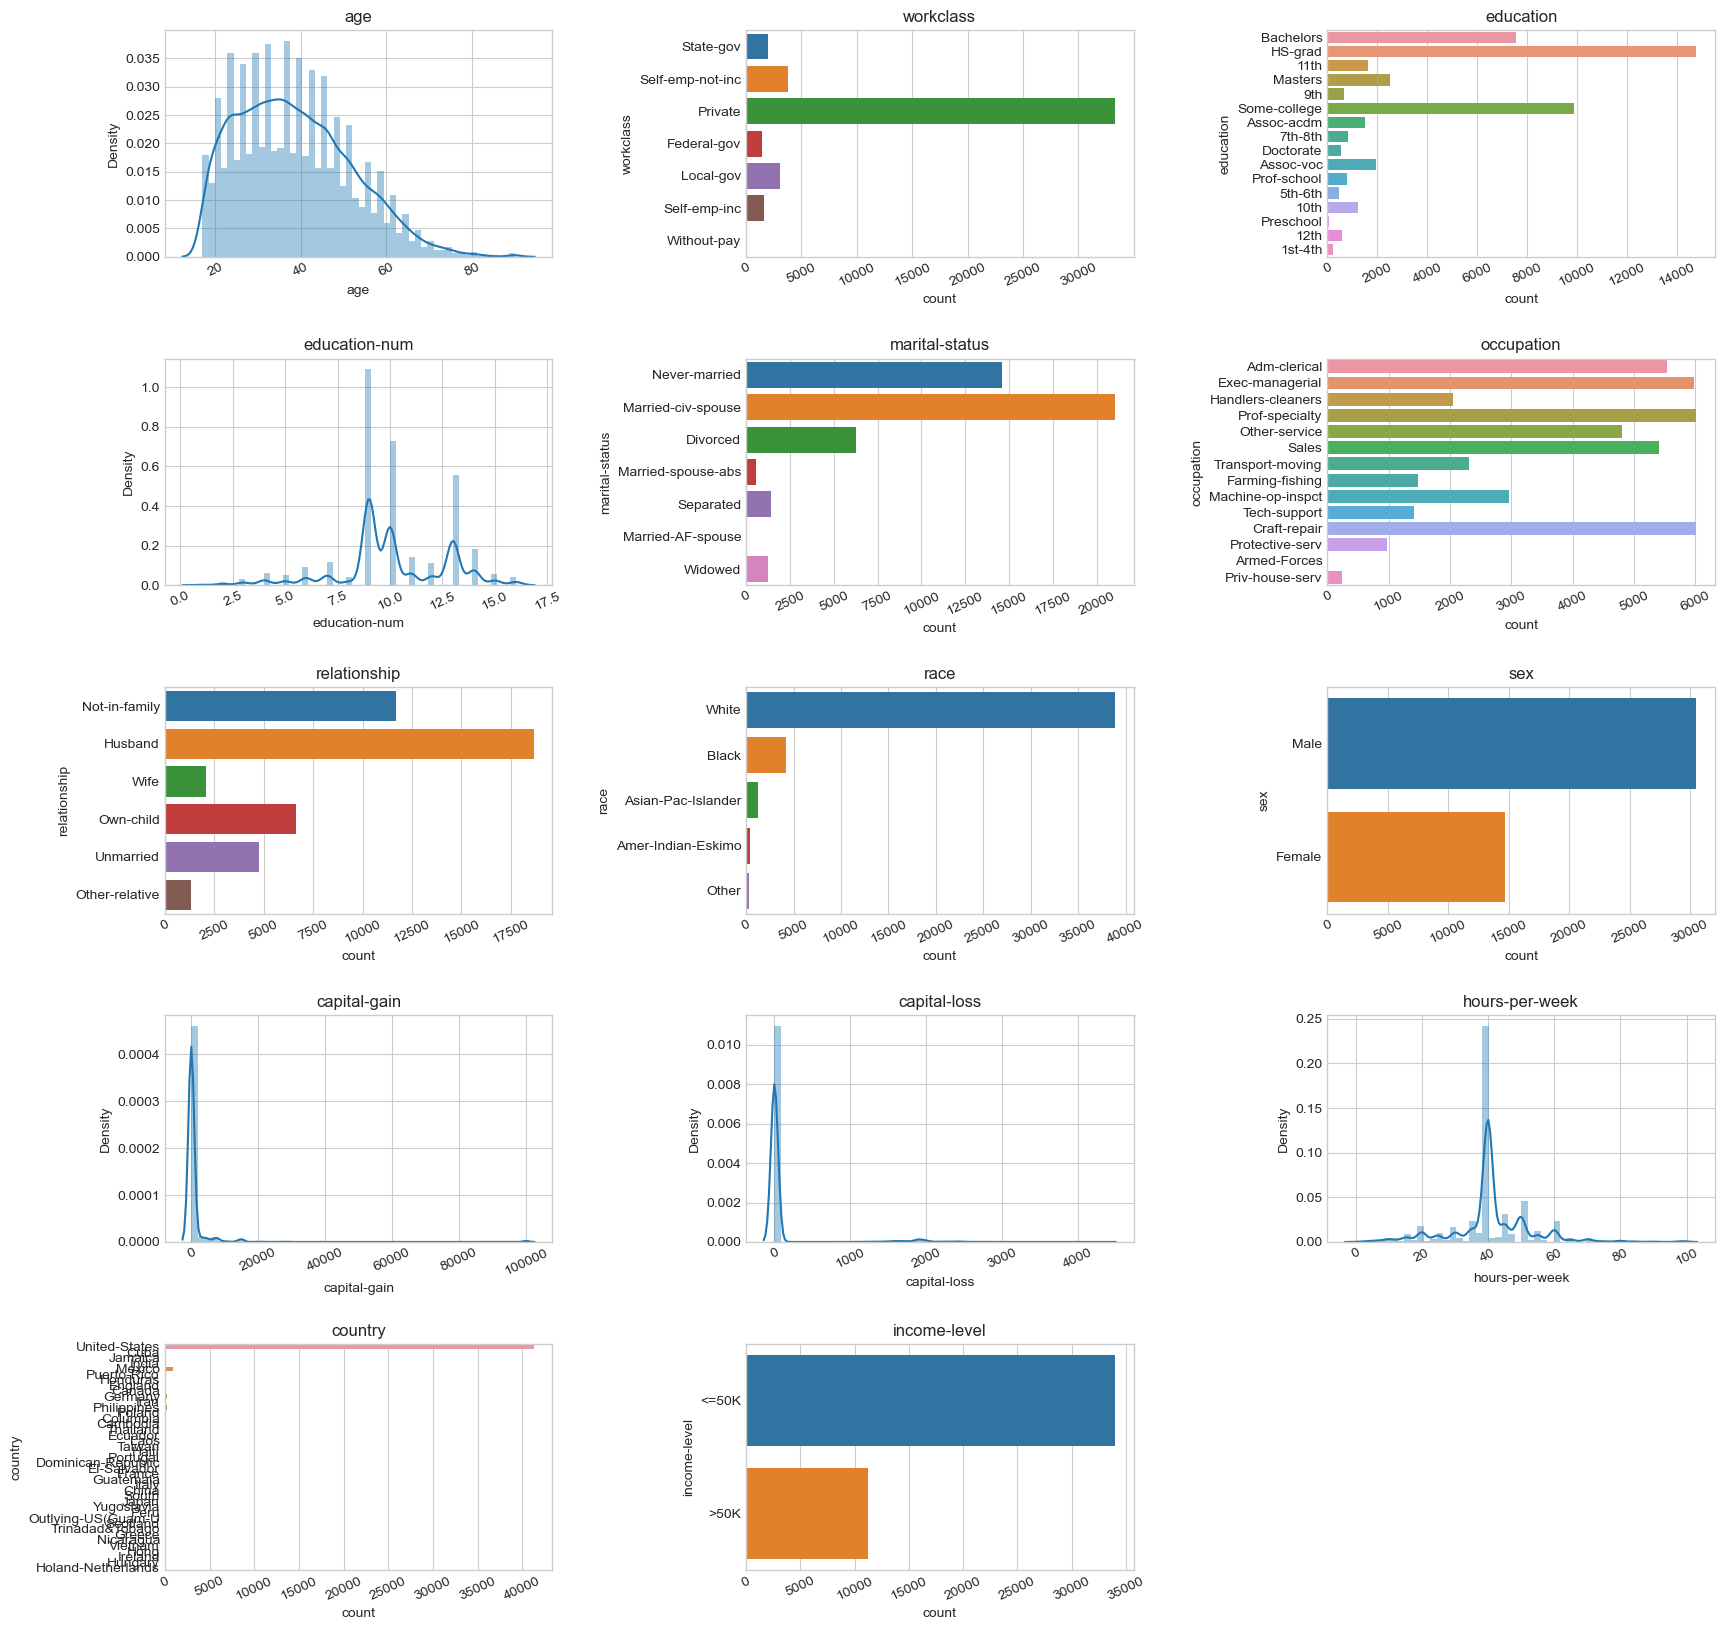

In [10]:
# 각 변수의 분포 상태 그리기  
def plot_distribution(dataset, cols, width, height, hspace, wspace):  
    plt.style.use('seaborn-whitegrid')  
    fig = plt.figure(figsize=(width,height))  
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)  
    rows = math.ceil(float(dataset.shape[1]) / cols)  
    for i, column in enumerate(dataset.columns):  
        ax = fig.add_subplot(rows, cols, i + 1)  
        ax.set_title(column)  
        if dataset.dtypes[column] == np.object:  
            g = sns.countplot(y=column, data=dataset)  
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]  
            g.set(yticklabels=substrings)  
            plt.xticks(rotation=25)  
        else:  
            g = sns.distplot(dataset[column])  
            plt.xticks(rotation=25)  
      
plot_distribution(dataset, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)



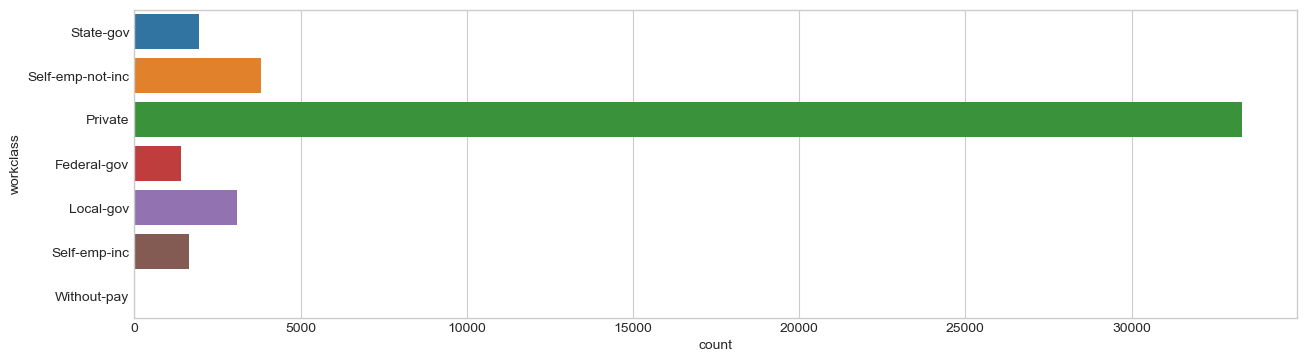

In [11]:
#이 데이터 세트에서 작업 유형(Workclass) 지표에는 민간(Private), 프리랜서 비기업(Self-emp-not-inc), 
#프리랜서 기업(Self-emp-inc), 연방 정부(Federal-gov), 지방 정부(Local-gov), 주 정부(State-gov), 무급(Without-pay), 
#무직 경험(Never-worked)의 8가지 유형이 있습니다.막대 차트를 그려 다양한 샘플 수를 확인합니다.
plt.style.use('seaborn-whitegrid')  
plt.figure(figsize=(15, 4))   
sns.countplot(y="workclass", data=dataset);  

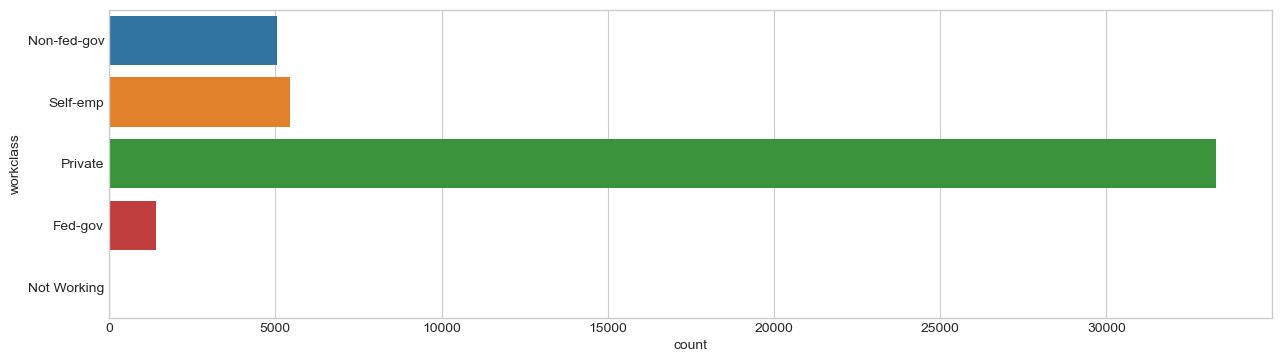

In [12]:
#위의 막대 그래프에서 민간 작업이 표본에서 차지하는 비중이 상대적으로 크고 비작업 및 비수입 작업 표본의 수는 매우 적음을 알 수 있으며 실제 상황에 따라 5가지 범주로 요약됩니다.
dataset.loc[dataset['workclass'] == 'Without-pay', 'workclass'] = 'Not Working'  
dataset.loc[dataset['workclass'] == 'Never-worked', 'workclass'] = 'Not Working'  
dataset.loc[dataset['workclass'] == 'Federal-gov', 'workclass'] = 'Fed-gov'  
dataset.loc[dataset['workclass'] == 'State-gov', 'workclass'] = 'Non-fed-gov'  
dataset.loc[dataset['workclass'] == 'Local-gov', 'workclass'] = 'Non-fed-gov'  
dataset.loc[dataset['workclass'] == 'Self-emp-not-inc', 'workclass'] = 'Self-emp'  
dataset.loc[dataset['workclass'] == 'Self-emp-inc', 'workclass'] = 'Self-emp'  
dataset.loc[dataset['workclass'] == ' Private', 'workclass'] = ' Private'  

plt.style.use('seaborn-whitegrid')  
fig = plt.figure(figsize=(15, 4))   
sns.countplot(y="workclass", data=dataset); 

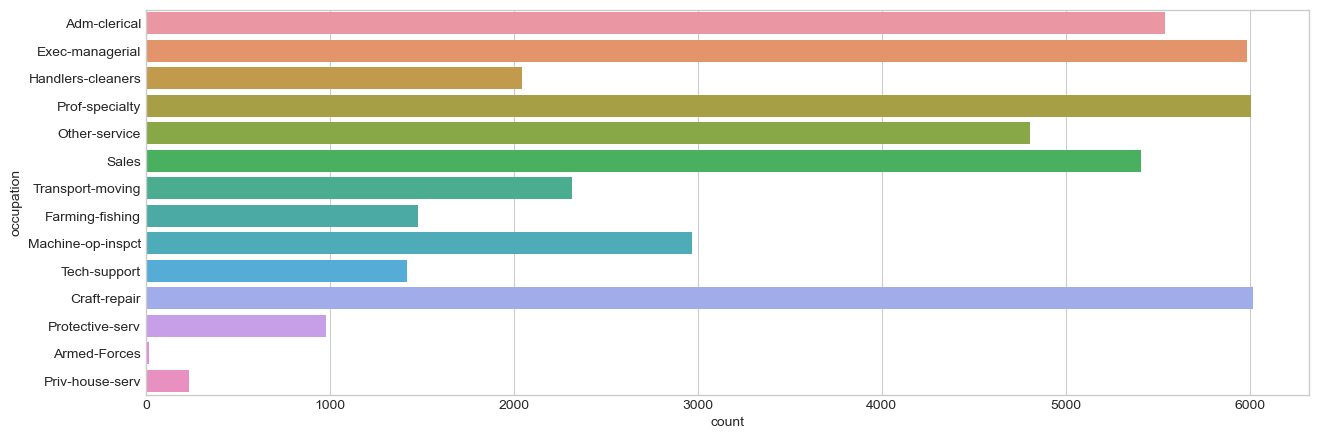

In [13]:
#본 데이터집중직업은 Tech-support(기술지원), Craft-repair(수공예정비), Other-service(기타직업), Sales(판매),
# Exec-managerial(집행주관), Prof-specialty(전문기술), Handlers-cleaners(노동청결), Machine-op-inspct(기계조작),
# Adm-clerical(관리문서), Farming-fishing-fishing(농업운수업) 등 총 14가지 유형이 있습니다.
plt.style.use('seaborn-whitegrid')  
plt.figure(figsize=(15,5))   
sns.countplot(y="occupation", data=dataset);  

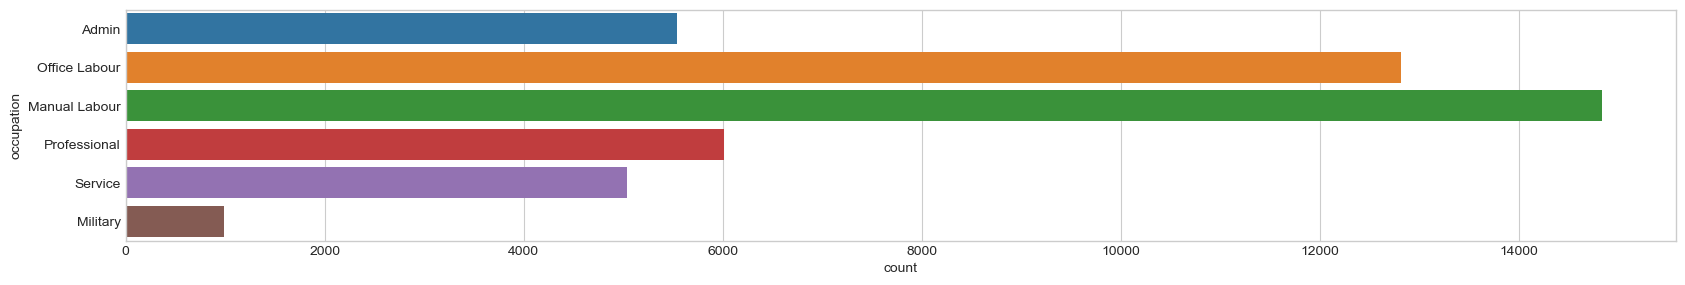

In [14]:
dataset.loc[dataset['occupation'] == 'Adm-clerical', 'occupation'] = 'Admin'  # 행정 사무원 
dataset.loc[dataset['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'  #군대
dataset.loc[dataset['occupation'] == 'Protective-serv', 'occupation'] = 'Military' 
dataset.loc[dataset['occupation'] == 'Craft-repair', 'occupation'] = 'Manual Labour'# 육체노동자  
dataset.loc[dataset['occupation'] == 'Transport-moving', 'occupation'] = 'Manual Labour'   
dataset.loc[dataset['occupation'] == 'Farming-fishing', 'occupation'] = 'Manual Labour'   
dataset.loc[dataset['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Manual Labour'    
dataset.loc[dataset['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Manual Labour'    
dataset.loc[dataset['occupation'] == 'Exec-managerial', 'occupation'] = 'Office Labour'  # 문서 작업
dataset.loc[dataset['occupation'] == 'Sales', 'occupation'] = 'Office Labour' 
dataset.loc[dataset['occupation'] == 'Tech-support', 'occupation'] = 'Office Labour'  
dataset.loc[dataset['occupation'] == 'Other-service', 'occupation'] = 'Service'#  봉사자
dataset.loc[dataset['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service'  
dataset.loc[dataset['occupation'] == 'Prof-specialty', 'occupation'] = 'Professional'# 기술자
  
plt.style.use('seaborn-whitegrid')  
fig = plt.figure(figsize=(20,3))  
sns.countplot(y="occupation", data=dataset);  

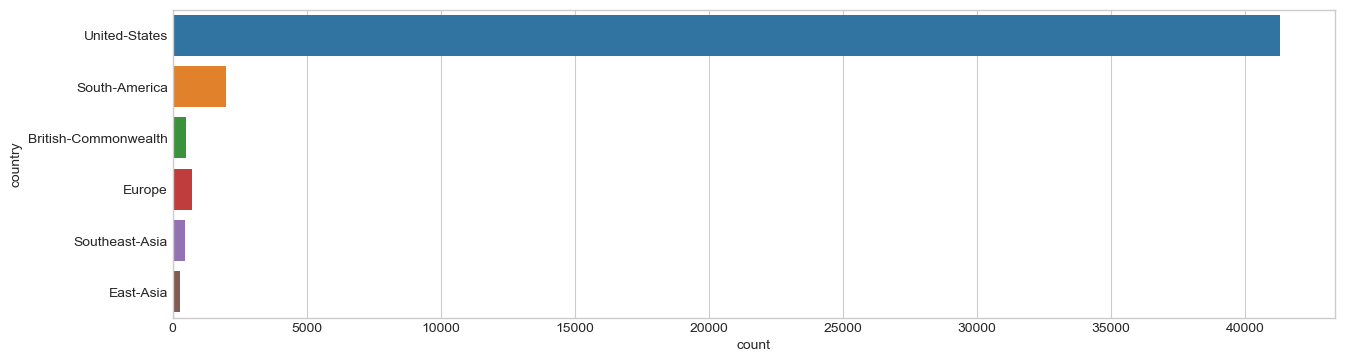

In [15]:
#데이터 설명에는 총 41개 국가와 지역이 나열되어 있으며 미국을 제외한 대부분의 국가 및 지역의 샘플이 거의 없으므로 이 국가 및 지역을 지역별로 통합합니다.
dataset.loc[dataset['country'] == 'China', 'country'] = 'East-Asia'  
dataset.loc[dataset['country'] == 'Hong', 'country'] = 'East-Asia'  
dataset.loc[dataset['country'] == 'Taiwan', 'country'] = 'East-Asia'  
dataset.loc[dataset['country'] == 'Japan', 'country'] = 'East-Asia'  
  
dataset.loc[dataset['country'] == 'Thailand', 'country'] = 'Southeast-Asia'  
dataset.loc[dataset['country'] == 'Vietnam', 'country'] = 'Southeast-Asia'  
dataset.loc[dataset['country'] == 'Laos', 'country'] = 'Southeast-Asia'  
dataset.loc[dataset['country'] == 'Philippines', 'country'] = 'Southeast-Asia'  
dataset.loc[dataset['country'] == 'Cambodia', 'country'] = 'Southeast-Asia'  
  
dataset.loc[dataset['country'] == 'Columbia', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Cuba', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Dominican-Republic', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Ecuador', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Guatemala', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'El-Salvador', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Haiti', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Honduras', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Mexico', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Nicaragua', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Outlying-US(Guam-USVI-etc)'  , 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Peru', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Jamaica', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Puerto-Rico', 'country'] = 'South-America'  
dataset.loc[dataset['country'] == 'Trinadad&Tobago', 'country'] = 'South-America'  
  
dataset.loc[dataset['country'] == 'Canada', 'country'] = 'British-Commonwealth'  
dataset.loc[dataset['country'] == 'England', 'country'] = 'British-Commonwealth'  
dataset.loc[dataset['country'] == 'India', 'country'] = 'British-Commonwealth'  
dataset.loc[dataset['country'] == 'Ireland', 'country'] = 'British-Commonwealth'  
dataset.loc[dataset['country'] == 'Scotland', 'country'] = 'British-Commonwealth'  
  
dataset.loc[dataset['country'] == 'France', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'Germany', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'Italy', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'Holand-Netherlands', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'Greece', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'Hungary', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'Iran', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'Yugoslavia', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'Poland', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'Portugal', 'country'] = 'Europe'  
dataset.loc[dataset['country'] == 'South', 'country'] = 'Europe'  
  
dataset.loc[dataset['country'] == 'United-States', 'country'] = 'United-States'  
#국가를 지역으로 통합한 후에도 미국과 비교하면 여전히 큰 차이가 있지만 각 범주의 표본 수는 더 균일합니다.
plt.style.use('seaborn-whitegrid')  
fig = plt.figure(figsize=(15,4))   
sns.countplot(y="country", data=dataset);  

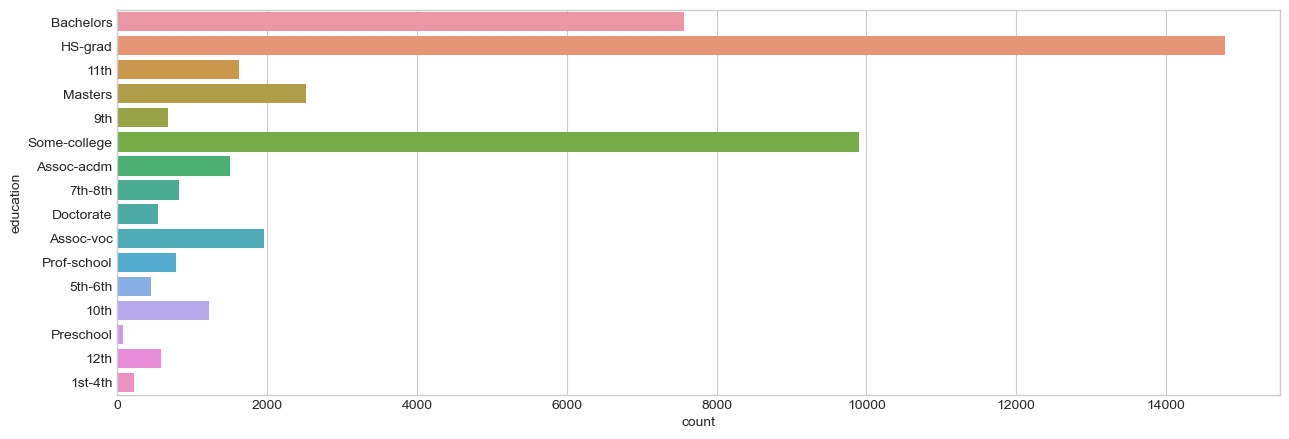

In [16]:
#교육 수준 막대 그래프를 그리며, 데이터 분포 상황을 관찰하다.
plt.style.use('seaborn-whitegrid')  
plt.figure(figsize=(15,5))   
sns.countplot(y="education", data=dataset);  

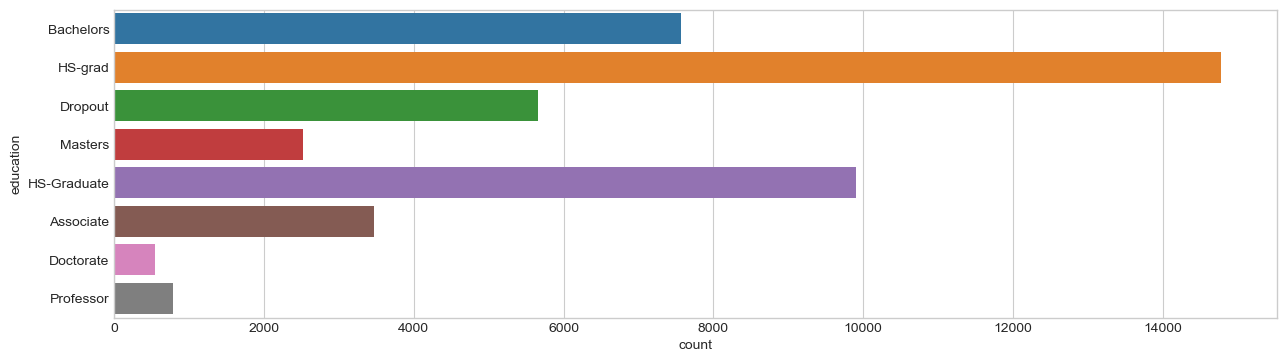

In [17]:
#위의 그림에서 보는 바와 같이 교육수준이 16가지에 달하며, 막대그래프를 생성함으로써 교육수준이 낮은 각 카테고리의
# 수가 적음을 알 수 있으므로 고등학교를 경계로 하여 1종(dropout)으로 통합하고, 2종(HS-Graduate)과 2종(Associate)을 통합한다.
dataset.loc[dataset['education'] == 'Preschool', 'education'] = 'Dropout'# 중퇴
dataset.loc[dataset['education'] == '1st-4th', 'education'] = 'Dropout'  
dataset.loc[dataset['education'] == '5th-6th', 'education'] = 'Dropout'  
dataset.loc[dataset['education'] == '7th-8th', 'education'] = 'Dropout'  
dataset.loc[dataset['education'] == '9th', 'education'] = 'Dropout' 
dataset.loc[dataset['education'] == '10th', 'education'] = 'Dropout'  
dataset.loc[dataset['education'] == '11th', 'education'] = 'Dropout'  
dataset.loc[dataset['education'] == '12th', 'education'] = 'Dropout'  
dataset.loc[dataset['education'] == 'Assoc-acdm', 'education'] = 'Associate'  # 전문대학 
dataset.loc[dataset['education'] == 'Assoc-voc', 'education'] = 'Associate'  
dataset.loc[dataset['education'] == 'HS-Grad', 'education'] = 'HS-Graduate'  #고등 학교  
dataset.loc[dataset['education'] == 'Some-college', 'education'] = 'HS-Graduate' 
dataset.loc[dataset['education'] == 'Prof-school', 'education'] = 'Professor'  # 직업학교.  
dataset.loc[dataset['education'] == 'Bachelors', 'education'] = 'Bachelors'  # 학사.  
dataset.loc[dataset['education'] == 'Masters', 'education'] = 'Masters'  # 석사.  
dataset.loc[dataset['education'] == 'Doctorate', 'education'] = 'Doctorate'  # 박사.
plt.style.use('seaborn-whitegrid')  
fig = plt.figure(figsize=(15,4))   
sns.countplot(y="education", data=dataset); 




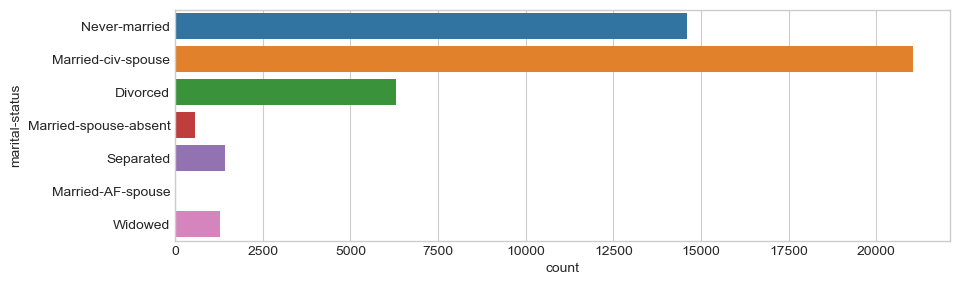

In [18]:
#데이터 설명에는 총 7가지 혼인 상태 Married-civ-spouse(기혼 서민 배우자), Divorced(이혼), Never-married(미혼), Separated(별거),
# Widowed(사별), Married-spouse-absent(기혼 배우자 외지), arried-AF-spouse(기혼 군속)가 나와 있습니다.
plt.style.use('seaborn-whitegrid')  
plt.figure(figsize=(10,3))   
sns.countplot(y="marital-status", data=dataset);



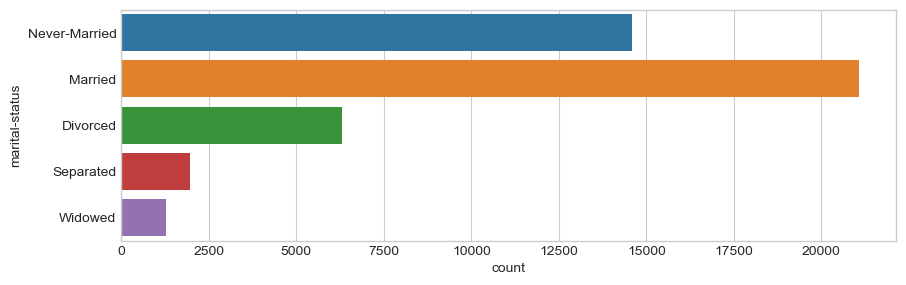

In [19]:
#본문은 이를 4가지로 통합하였다: 결혼하지 않은 것, 이혼한 것, 별거한 것, 기혼한 것.
dataset.loc[dataset['marital-status'] == 'Never-married', 'marital-status'] = 'Never-Married'  # 한 번도 결혼한 적이 없다  
dataset.loc[dataset['marital-status'] == 'Divorced', 'marital-status'] = 'Divorced'# 이혼.  
dataset.loc[dataset['marital-status'] == 'Widowed', 'marital-status'] = 'Widowed'# 배우자를 잃다. 
dataset.loc[dataset['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Separated'  # 별거하다  
dataset.loc[dataset['marital-status'] == 'Separated', 'marital-status'] = 'Separated'
dataset.loc[dataset['marital-status'] == 'Married-AF-spouse', 'marital-status'] = 'Married'  # 기혼  
dataset.loc[dataset['marital-status'] == 'Married-civ-spouse', 'marital-status'] = 'Married'    
  
plt.style.use('seaborn-whitegrid')  
fig = plt.figure(figsize=(10,3))   
sns.countplot(y="marital-status", data=dataset);  



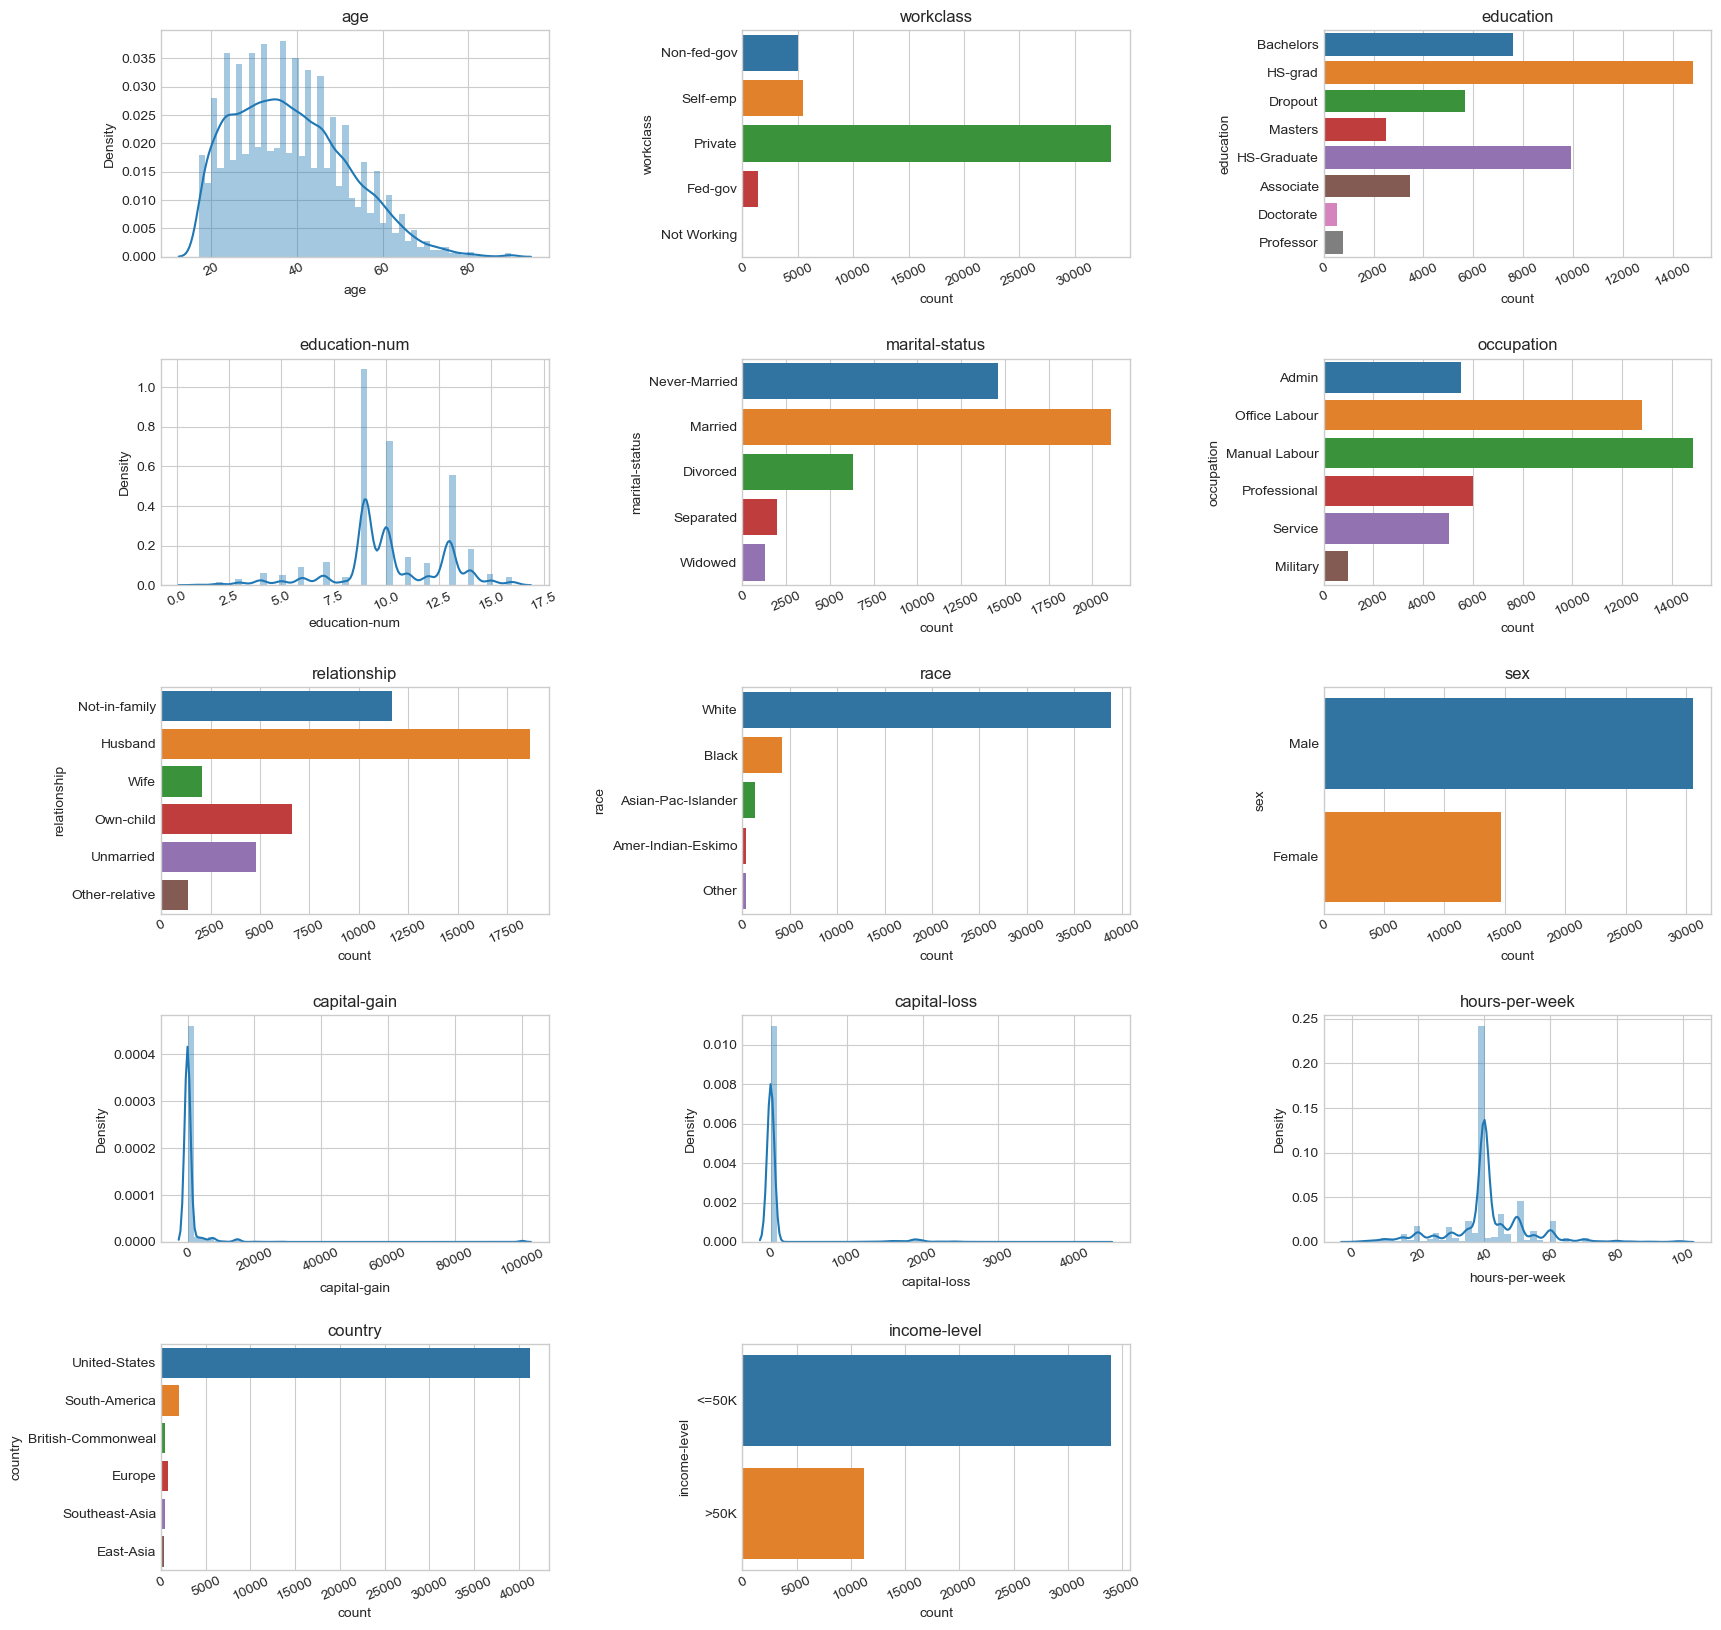

In [20]:
plot_distribution(dataset, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)


In [21]:
dataset_num = dataset.copy() # 데이터 세트 복사  
  
dataset_num['workclass'] = dataset_num['workclass'].factorize()[0]  
dataset_num['education'] = dataset_num['education'].factorize()[0]  
dataset_num['marital-status'] = dataset_num['marital-status'].factorize()[0]  
dataset_num['occupation'] = dataset_num['occupation'].factorize()[0]  
dataset_num['relationship'] = dataset_num['relationship'].factorize()[0]  
dataset_num['race'] = dataset_num['race'].factorize()[0]  
dataset_num['sex'] = dataset_num['sex'].factorize()[0]  
dataset_num['country'] = dataset_num['country'].factorize()[0]  
dataset_num['income-level'] = dataset_num['income-level'].factorize()[0]  



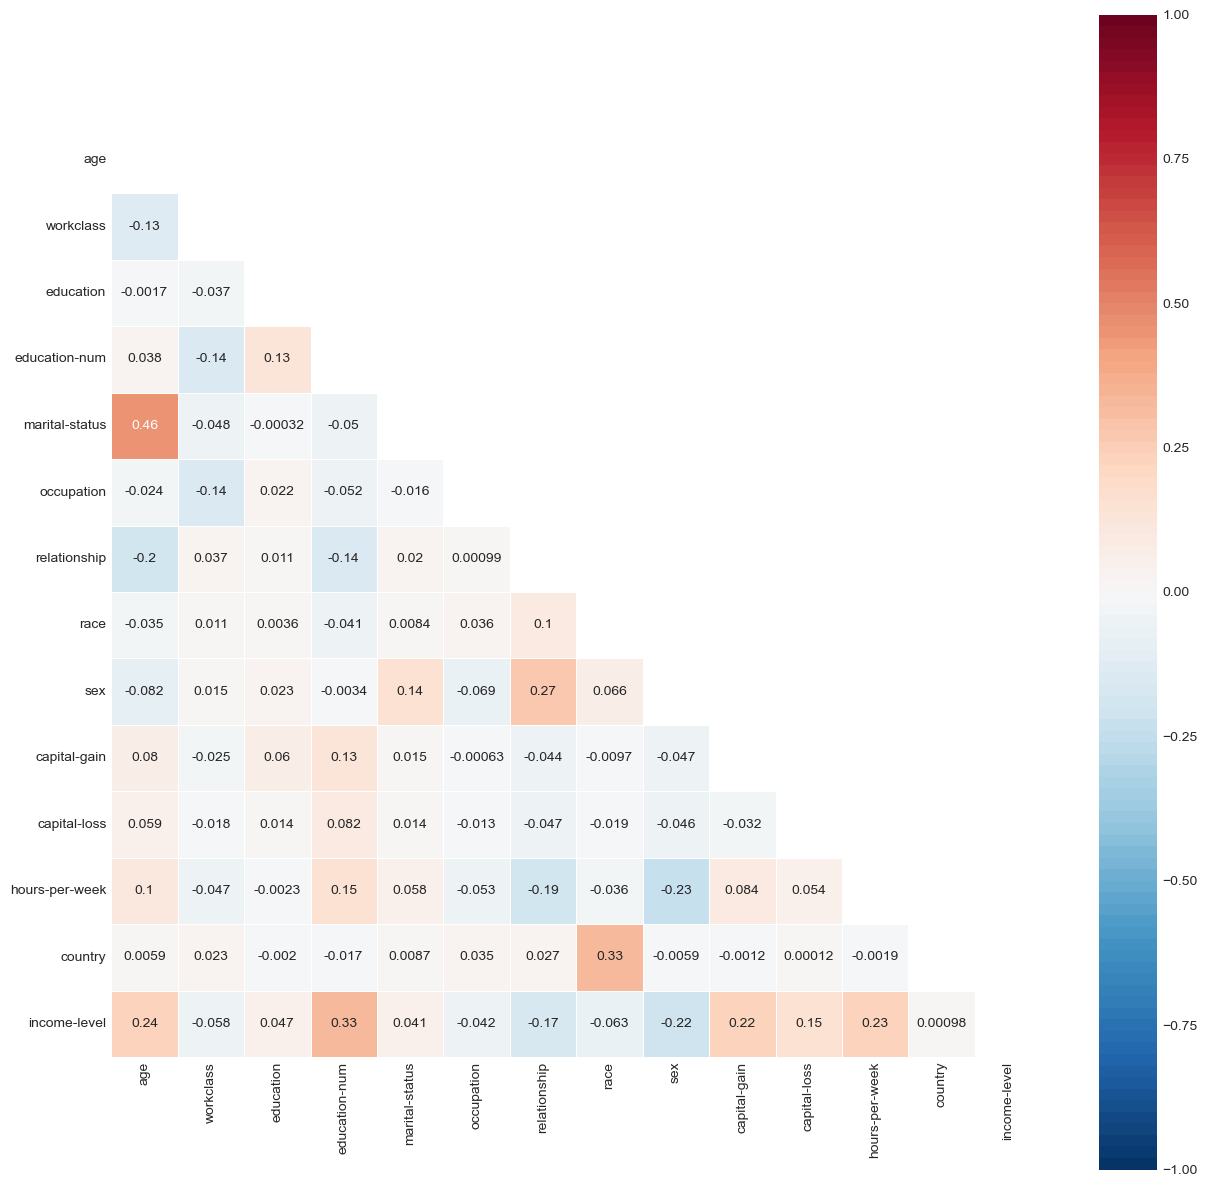

In [22]:
#변수 간의 상관 관계 검사
plt.style.use('seaborn-whitegrid')  
fig = plt.figure(figsize=(15, 15))   
  
mask = np.zeros_like(dataset_num.corr(), dtype=np.bool)  
mask[np.triu_indices_from(mask)] = True  
sns.heatmap(dataset_num.corr(), vmin=-1, vmax=1, square=True,   
            cmap=sns.color_palette("RdBu_r", 100),   
            mask=mask, annot=True, linewidths=.5);  



In [23]:
#  독립 변수와 종속 변수 분할 
y_data=dataset_num['income-level']  # 소득수준income-level열   종속변수
x_data=dataset_num.drop(['income-level'],axis=1)  # 소득수준 income-level 열을 제외한 나머지 열을 X_data로  독립변수


In [24]:
# 훈련 세트와 테스트 세트를 분할하다.  
x_train,x_test,y_train,y_test = train_test_split(  
    x_data,  
    y_data,  
    test_size=0.2,  
    random_state=1,  
    stratify=y_data)  



In [1]:
# 모델 세트용 템플릿을 구성하고, 자동으로 훈련 세트를 호출하여 들어오는 모델을 훈련하고, 검증 세트를 사용하여 모델을 검증하고, 관련 지표를 출력하도록 설계합니다.
def fit_ml_algo(algo, X_train, y_train, X_test, cv):  
    model = algo.fit(X_train, y_train)  
    test_pred = model.predict(X_test)  
    try:  
        probs = model.predict_proba(X_test)[:,1]  
    except Exception as e:  
        probs = "Unavailable"  
        print('Warning: Probs unavaliable.')  
        print('Reason: ', e)  
          
      
    acc = round(model.score(X_test, y_test) * 100, 2)   
    
    # CV -> 모델 여러번 학습 및 검증  
    train_pred = model_selection.cross_val_predict(algo,   
                                                  X_train,   
                                                  y_train,   
                                                  cv=cv,   
                                                  n_jobs = -1)  
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)  
    return train_pred, test_pred, acc, acc_cv, probs  



In [26]:
# 후보 모델 매개 변수 보고  
def report(results, n_top=5):  
    for i in range(1, n_top + 1):  
        candidates = np.flatnonzero(results['rank_test_score'] == i)  
        for candidate in candidates:  
            print("Model with rank: {0}".format(i))  
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(  
                  results['mean_test_score'][candidate],  
                  results['std_test_score'][candidate]))  
            print("Parameters: {0}\n".format(results['params'][candidate]))  



In [27]:
# 구축함수는 TPR(True Positive Rate)과 FPR(False Positive Rate)을 계산하고 ROC 곡선을 그리는 데 사용된다.
def plot_roc_curve(y_test, preds):  
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)  
    roc_auc = metrics.auc(fpr, tpr)  
    plt.title('ROC')  
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)  
    plt.legend(loc = 'lower right')  
    plt.plot([0, 1], [0, 1],'r--')  
    plt.xlim([-0.01, 1.01])  
    plt.ylim([-0.01, 1.01])  
    plt.ylabel('TPR')  
    plt.xlabel('FPR')  
    plt.show()  



주어진 함수는 ROC(Receiver Operating Characteristic) 곡선을 그리는 데 사용됩니다. 이 곡선은 분류 모델의 성능을 평가하는 데 유용한 도구로, 특히 이진 분류 문제에서 자주 사용됩니다. ROC 곡선은 TPR(True Positive Rate)과 FPR(False Positive Rate)을 계산하여 그리며, AUC(Area Under the Curve) 값도 함께 표시합니다. AUC 값은 ROC 곡선 아래의 면적을 나타내며, 모델의 분류 성능을 정량적으로 평가하는 데 사용됩니다.

이 함수는 다음과 같은 입력을 받습니다:

y_test: 실제 레이블 값의 배열 (테스트 데이터의 실제 값).
preds: 모델이 예측한 확률 값의 배열 (테스트 데이터에 대한 예측 값).
함수의 주요 단계는 다음과 같습니다:

metrics.roc_curve 함수를 사용하여 FPR, TPR, 임곗값을 계산합니다.
metrics.auc 함수를 사용하여 ROC 곡선 아래의 면적인 AUC 값을 계산합니다.
matplotlib.pyplot을 사용하여 ROC 곡선을 그립니다.
대각선 기준선 (무작위 분류기의 성능)을 빨간 점선으로 그립니다.
TPR과 FPR의 범위를 0에서 1까지로 설정합니다.
그래프에 제목과 라벨을 설정하고, 최종적으로 그래프를 표시합니다.
이 함수를 사용하면 모델의 ROC 곡선을 시각화하고, AUC 값을 통해 모델의 분류 성능을 평가할 수 있습니다.

In [28]:
# P-R 곡선 그리기 방법 구축  
def plot_pr_curve(y_test, probs):  
    precision, recall, _ = precision_recall_curve(y_test, probs)  
    plt.step(recall, precision, color='b', alpha=0.2,  
             where='post')  
    plt.fill_between(recall, precision, step='post', alpha=0.2,  
                     color='b')  
    plt.xlabel('Recall')  
    plt.ylabel('Precision')  
    plt.ylim([0.0, 1.05])  
    plt.xlim([0.0, 1.0])  
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(  
              average_precision_score(y_test, probs)))  



In [29]:
# 로지스틱 회귀
# 하이퍼파라미터 설정 및 랜덤 서치 생성
n_iter_search = 10  # 10번 훈련, 값이 클수록 매개변수 정확도가 높아지지만 검색 시간이 더 오래 걸립니다.
param_dist = {'penalty': ['l2', 'l1'], 
              'class_weight': [None, 'balanced'],
              'C': np.logspace(-20, 20, 10000), 
              'intercept_scaling': np.logspace(-20, 20, 10000)} 
random_search = RandomizedSearchCV(LogisticRegression(),  # 사용할 분류기
                                   n_jobs=-1,  # 모든 CPU를 사용하여 훈련합니다. 기본값은 1로 1개의 CPU를 사용합니다.
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search)  # 훈련 횟수
start = time.time()
random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)



RandomizedSearchCV took 7.11 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.794 (std: 0.002)
Parameters: {'penalty': 'l2', 'intercept_scaling': 3.874885071119068e-18, 'class_weight': None, 'C': 0.00031743160501549936}

Model with rank: 2
Mean validation score: 0.784 (std: 0.003)
Parameters: {'penalty': 'l2', 'intercept_scaling': 27697.73427403744, 'class_weight': None, 'C': 5684280.065461059}

Model with rank: 3
Mean validation score: 0.784 (std: 0.003)
Parameters: {'penalty': 'l2', 'intercept_scaling': 43497.4548894717, 'class_weight': None, 'C': 792300425.1845899}

Model with rank: 4
Mean validation score: 0.671 (std: 0.009)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.1311113246097974e-05, 'class_weight': 'balanced', 'C': 14699979587130.771}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 4.2821627207471736e+16, 'class_weight': 'balanced', 'C': 9.842361448831272e-10}



In [30]:
# 랜덤 탐색기에서 얻은 매개변수가 가장 좋은 로지스틱 회귀 모델을 호출하여 훈련합니다.  
start_time = time.time()  
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(  
                                                                 random_search.best_estimator_,   
                                                                 x_train,   
                                                                 y_train,   
                                                                 x_test,   
                                                                 10)  
log_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_log)  
print("Accuracy CV 10-Fold: %s" % acc_cv_log)  
print("Running Time: %s s" % datetime.timedelta(seconds=log_time).seconds)  



Accuracy: 79.56
Accuracy CV 10-Fold: 79.35
Running Time: 1 s


In [31]:
# k-Nearest Neighbors  
start_time = time.time()  
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn  = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,  
                                   n_jobs = -1),   
                                   x_train,   
                                   y_train,   
                                   x_test,   
                                   10)  
knn_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_knn)  
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)  
print("Running Time: %s s" % datetime.timedelta(seconds=knn_time))  



Accuracy: 82.83
Accuracy CV 10-Fold: 82.62
Running Time: 0:00:02.618220 s


In [32]:
# Gaussian Naive Bayes  
start_time = time.time()  
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau= fit_ml_algo(GaussianNB(),   
              x_train,   
              y_train,   
              x_test,   
              10)  
gaussian_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_gaussian)  
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)  
print("Running Time: %s s" % datetime.timedelta(seconds=gaussian_time).seconds) 



Accuracy: 80.19
Accuracy CV 10-Fold: 79.88
Running Time: 0 s


In [33]:
# Linear SVC  
start_time = time.time()  
# kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’  
svc_clf = SVC(probability=True, max_iter=1000, kernel='linear')  
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, probs_svc= fit_ml_algo(svc_clf,  
              x_train,   
              y_train,  
              x_test,   
              10)  
linear_svc_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_linear_svc)  
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)  
print("Running Time: %s s" % datetime.timedelta(seconds=linear_svc_time).seconds)  



Accuracy: 53.29
Accuracy CV 10-Fold: 35.68
Running Time: 28 s


In [34]:
# Stochastic Gradient Descent 무작위 구배 하강
start_time = time.time()  
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, probs_sgd= fit_ml_algo(  
              SGDClassifier(n_jobs = -1, loss='log'),   
              x_train,   
              y_train,   
              x_test,   
              10)  
sgd_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_sgd)  
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)  
print("Running Time: %s s" % datetime.timedelta(seconds=sgd_time).seconds)  



Accuracy: 78.7
Accuracy CV 10-Fold: 77.64
Running Time: 0 s


In [35]:
# Decision Tree Classifier  
start_time = time.time()  
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt= fit_ml_algo(DecisionTreeClassifier(),   
              x_train,   
              y_train,   
              x_test,   
              10)  
dt_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_dt)  
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)  
print("Running Time: %s s" % datetime.timedelta(seconds=dt_time).seconds)  



Accuracy: 81.91
Accuracy CV 10-Fold: 81.83
Running Time: 0 s


In [36]:
# Gradient Boosting Trees 그레이디언트업 의사결정 트리 
start_time = time.time()  
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt= fit_ml_algo(GradientBoostingClassifier(),   
              x_train,   
              y_train,   
              x_test,   
              10)  
gbt_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_gbt)  
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)  
print("Running Time: %s s" % datetime.timedelta(seconds=gbt_time).seconds)  



Accuracy: 86.19
Accuracy CV 10-Fold: 85.94
Running Time: 7 s


In [37]:
# AdaBoost Classifier  
start_time = time.time()  
train_pred_adb, test_pred_adb, acc_adb, acc_cv_adb, probs_adb= fit_ml_algo(AdaBoostClassifier(),   
              x_train,   
              y_train,   
              x_test,   
              10)  
adb_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_adb)  
print("Accuracy CV 10-Fold: %s" % acc_cv_adb)  
print("Running Time: %s s" % datetime.timedelta(seconds=adb_time).seconds)  



Accuracy: 85.86
Accuracy CV 10-Fold: 85.41
Running Time: 2 s


In [38]:
# Voting Classifier  
start_time = time.time()  
voting_clf = VotingClassifier(estimators=[  
    ('log_clf', LogisticRegression()),   
    ('gnb_clf', GaussianNB()),  
    ('rf_clf', RandomForestClassifier(n_estimators=10)),  
    ('gb_clf', GradientBoostingClassifier()),  
    ('dt_clf', DecisionTreeClassifier(random_state=666))],  
                             voting='soft', n_jobs = -1)  
train_pred_vot, test_pred_vot, acc_vot, acc_cv_vot, probs_vot= fit_ml_algo(voting_clf,   
              x_train,   
              y_train,   
              x_test,   
              10)  
vot_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_vot)  
print("Accuracy CV 10-Fold: %s" % acc_cv_vot)  
print("Running Time: %s s" % datetime.timedelta(seconds=vot_time).seconds)  



Accuracy: 84.48
Accuracy CV 10-Fold: 84.49
Running Time: 8 s


In [39]:
# 중간에서 참조할 하이퍼 파라미터 집합  
param_dist = {"max_depth": [10, None],  
              "max_features": sp_randint(1, 11),  
              "min_samples_split": sp_randint(2, 20),  
              "min_samples_leaf": sp_randint(1, 11),  
              "bootstrap": [True, False],  
              "criterion": ["gini", "entropy"]}  
  
# Run Randomized Search  
n_iter_search = 10  
random_search = RandomizedSearchCV(  
                                   RandomForestClassifier(n_estimators=10),  
                                   n_jobs = -1,   
                                   param_distributions=param_dist,   
                                   n_iter=n_iter_search)  
  
start = time.time()  
random_search.fit(x_train, y_train)  
print("RandomizedSearchCV took %.2f seconds for %d candidates"  
      " parameter settings." % ((time.time() - start), n_iter_search))  
report(random_search.cv_results_)  



RandomizedSearchCV took 3.63 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.856 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 19}

Model with rank: 2
Mean validation score: 0.856 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 7, 'min_samples_split': 9}

Model with rank: 3
Mean validation score: 0.854 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 2}

Model with rank: 4
Mean validation score: 0.854 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 9, 'min_samples_split': 18}

Model with rank: 5
Mean validation score: 0.852 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max

In [40]:
# 랜덤 탐색기를 사용하여 계산한 최적의 하이퍼 파라미터 모델을 사용하여 계산하다  
import datetime
start_time = time.time()  

now = datetime.datetime.now()
print(now)

rfc = random_search.best_estimator_  
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(  
                                                             rfc,   
                                                             x_train,   
                                                             y_train,   
                                                             x_test,   
                                                             10)  
rf_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_rf)  
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)  
print("Running Time: %s s" % datetime.timedelta(seconds=rf_time).seconds)  



2023-06-03 05:18:35.868518
Accuracy: 86.21
Accuracy CV 10-Fold: 85.6
Running Time: 1 s


In [41]:
models = pd.DataFrame({  
    'Model': ['KNN', 'Logistic Regression',   
              'Random Forest', 'Naive Bayes',   
              'Stochastic Gradient Decent', 'Linear SVC',   
              'Decision Tree', 'Gradient Boosting Trees',   
              'AdaBoost', 'Voting'],  
    'Acc': [  
        acc_knn, acc_log, acc_rf,   
        acc_gaussian, acc_sgd,   
        acc_linear_svc, acc_dt,  
        acc_gbt, acc_adb, acc_vot  
    ],  
    'Acc_cv': [  
        acc_cv_knn, acc_cv_log,   
        acc_cv_rf, acc_cv_gaussian,   
        acc_cv_sgd, acc_cv_linear_svc,   
        acc_cv_dt, acc_cv_gbt,  
        acc_cv_adb, acc_cv_vot  
    ],  
    'precision': [  
        round(precision_score(y_test,test_pred_knn), 3),  
        round(precision_score(y_test,test_pred_log), 3),  
        round(precision_score(y_test,test_pred_rf), 3),  
        round(precision_score(y_test,test_pred_gaussian), 3),  
        round(precision_score(y_test,test_pred_sgd), 3),  
        round(precision_score(y_test,test_pred_svc), 3),  
        round(precision_score(y_test,test_pred_dt), 3),  
        round(precision_score(y_test,test_pred_gbt), 3),  
        round(precision_score(y_test,test_pred_adb), 3),  
        round(precision_score(y_test,test_pred_vot), 3),    
    ],  
    'recall': [  
        round(recall_score(y_test,test_pred_knn), 3),  
        round(recall_score(y_test,test_pred_log), 3),  
        round(recall_score(y_test,test_pred_rf), 3),  
        round(recall_score(y_test,test_pred_gaussian), 3),  
        round(recall_score(y_test,test_pred_sgd), 3),  
        round(recall_score(y_test,test_pred_svc), 3),  
        round(recall_score(y_test,test_pred_dt), 3),  
        round(recall_score(y_test,test_pred_gbt), 3),  
        round(recall_score(y_test,test_pred_adb), 3),  
        round(recall_score(y_test,test_pred_vot), 3),    
    ],  
    'F1': [  
        round(f1_score(y_test,test_pred_knn,average='binary'), 3),  
        round(f1_score(y_test,test_pred_log,average='binary'), 3),  
        round(f1_score(y_test,test_pred_rf,average='binary'), 3),  
        round(f1_score(y_test,test_pred_gaussian,average='binary'), 3),  
        round(f1_score(y_test,test_pred_sgd,average='binary'), 3),  
        round(f1_score(y_test,test_pred_svc,average='binary'), 3),  
        round(f1_score(y_test,test_pred_dt,average='binary'), 3),  
        round(f1_score(y_test,test_pred_gbt,average='binary'), 3),  
        round(f1_score(y_test,test_pred_adb,average='binary'), 3),  
        round(f1_score(y_test,test_pred_vot,average='binary'), 3),      
    ],  
})  
models.sort_values(by='Acc', ascending=False)  



,Model,Acc,Acc_cv,precision,recall,F1
2,Random Forest,86.21,85.60,0.790,0.605,0.685
7,Gradient Boosting Trees,86.19,85.94,0.808,0.581,0.676
8,AdaBoost,85.86,85.41,0.766,0.618,0.684
9,Voting,84.48,84.49,0.785,0.514,0.622
0,KNN,82.83,82.62,0.658,0.639,0.649
6,Decision Tree,81.91,81.83,0.641,0.613,0.627
3,Naive Bayes,80.19,79.88,0.702,0.349,0.466
1,Logistic Regression,79.56,79.35,0.732,0.277,0.401
4,Stochastic Gradient Decent,78.70,77.64,0.598,0.429,0.500
5,Linear SVC,53.29,35.68,0.283,0.576,0.379


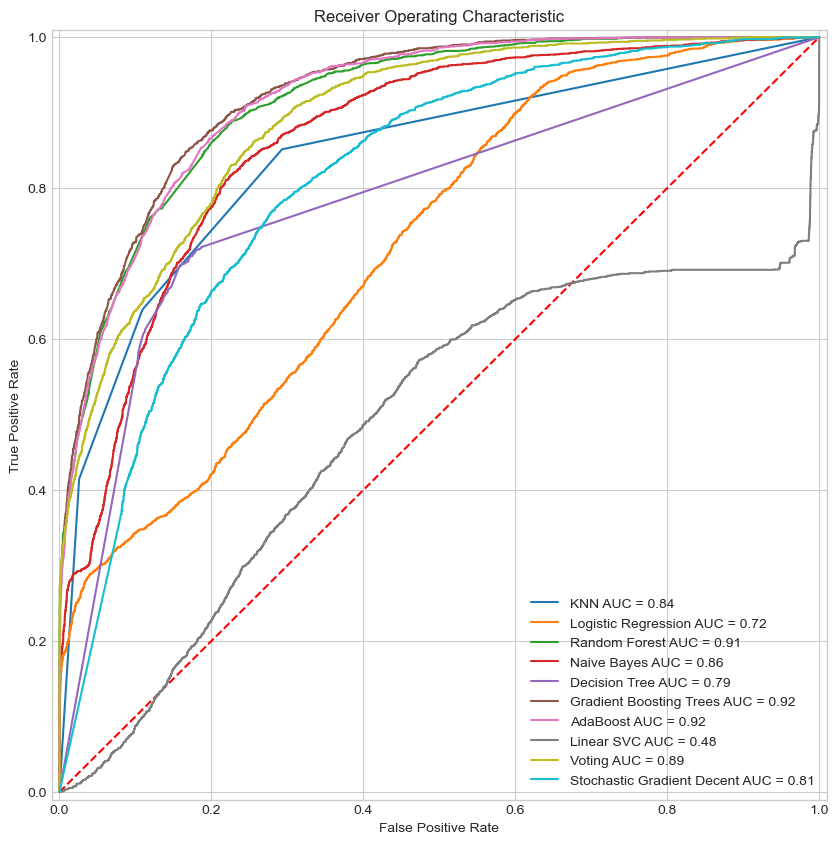

In [42]:
# ROC  곡선 그리기
plt.style.use('seaborn-whitegrid')  
fig = plt.figure(figsize=(10,10))   
models = [  
    'KNN',   
    'Logistic Regression',   
    'Random Forest',   
    'Naive Bayes',   
    'Decision Tree',   
    'Gradient Boosting Trees',  
    'AdaBoost',  
    'Linear SVC',  
    'Voting',  
    'Stochastic Gradient Decent'  
]  
probs = [  
    probs_knn,  
    probs_log,  
    probs_rf,  
    probs_gau,  
    probs_dt,  
    probs_gbt,  
    probs_adb,  
    probs_svc,  
    probs_vot,  
    probs_sgd  
]  
colormap = plt.cm.tab10 #nipy_spectral, Set1, Paired, tab10, gist_ncar  
colors = [colormap(i) for i in np.linspace(0, 1,len(models))]  
plt.title('Receiver Operating Characteristic')  
plt.plot([0, 1], [0, 1],'r--')  
plt.xlim([-0.01, 1.01])  
plt.ylim([-0.01, 1.01])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
def plot_roc_curves(y_test, prob, model):  
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)  
    roc_auc = metrics.auc(fpr, tpr)  
    label = model + ' AUC = %0.2f' % roc_auc  
    plt.plot(fpr, tpr, 'b', label=label, color=colors[i])  
    plt.legend(loc = 'lower right')    
for i, model in list(enumerate(models)):  
    plot_roc_curves(y_test, probs[i], models[i])



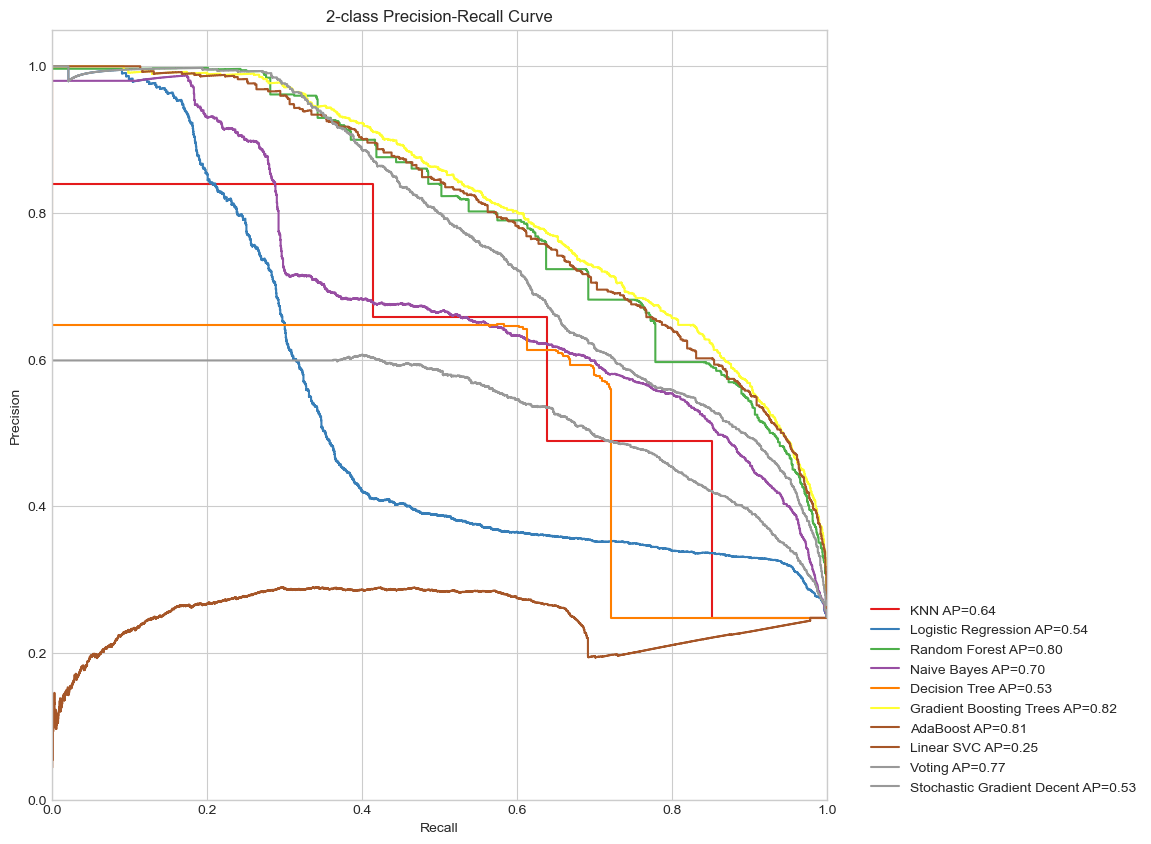

In [43]:
#P-R 곡선(Precision-Recall Curve) 그리기 방법 구축  
fig = plt.figure(figsize=(10,10))   
plt.xlabel('Recall')    
plt.ylabel('Precision')    
plt.ylim([0.0, 1.05])    
plt.xlim([0.0, 1.0])   
plt.title('2-class Precision-Recall Curve')  
colormap = plt.cm.Set1 #nipy_spectral, Set1, Paired, gist_ncar  
colors = [colormap(i) for i in np.linspace(0, 1,len(models))]  
def plot_pr_curve_overall(y_test, probs, model):    
    precision, recall, _ = precision_recall_curve(y_test, probs)    
    label = (model + ' AP={0:0.2f}'.format(average_precision_score(y_test, probs)))  
    plt.step(recall, precision, color=colors[i],     
             where='post', label=label)    
#     plt.fill_between(recall, precision, step='post', alpha=0.2, color=colors[i])    
    plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)   
for i, model in list(enumerate(models)):  
    plot_pr_curve_overall(y_test, probs[i], models[i])  

